# **Chicago Crime Time Series**

_John Andrew Dixon_

---

##### **Imports**

In [8]:
import glob
import pandas as pd
import seaborn as sns

##### **Data Load**

In [3]:
# Get the list of crime files from "./Data/Chicago/"
crime_files = sorted(glob.glob("./Data/Chicago/*.csv"))
# Create one DataFrame from all the files
original_df = pd.concat([pd.read_csv(crime_file) for crime_file in crime_files])
# Verify it worked
original_df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1310288,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.0,NaN,41.756650,-87.641608
1,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704087
2,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836
3,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.0,15.0,41.774819,-87.702896
4,3206463,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,41.735507,-87.690095
...,...,...,...,...,...,...,...,...,...,...,...,...
100405,13091787,05/30/2023 12:48:00 PM,THEFT,RETAIL THEFT,DRUG STORE,False,False,1733,17.0,33.0,41.953925,-87.707307
100406,13090302,05/30/2023 12:50:00 PM,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE,False,False,522,5.0,9.0,41.677237,-87.623871
100407,13089754,05/30/2023 12:52:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CONVENIENCE STORE,False,False,2511,25.0,36.0,41.938194,-87.793558
100408,13090346,05/30/2023 12:55:00 PM,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,1913,19.0,46.0,41.963071,-87.655984


---

## **Stakeholder Questions**

### **Comparing Police Districts:**

#### _Which district has the most crimes? Which has the least?_

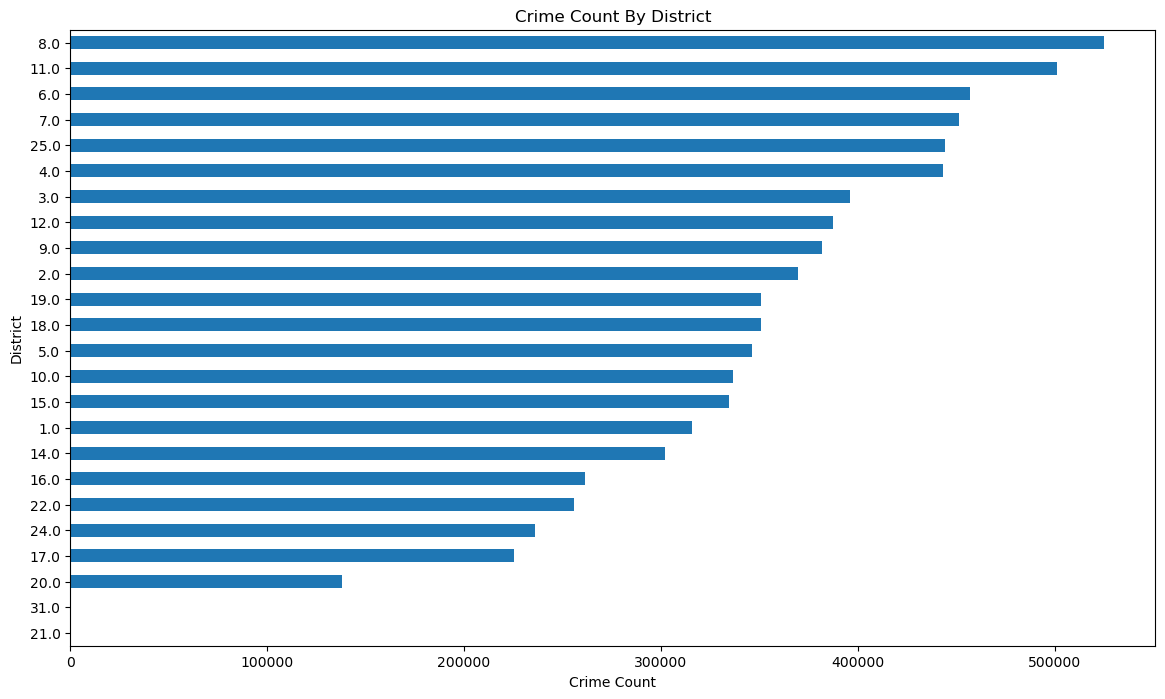

In [19]:
ax = original_df["District"].value_counts().sort_values().plot(kind="barh", figsize=(14, 8))
ax.set_title("Crime Count By District")
ax.set_xlabel("Crime Count")
ax.set_ylabel("District");

District 8 has, undoubtedly, the most amount of crime. But, it's harder to find the district with the least amount of crime since. Because district 21, according to our data, has the least amount of crime but according to the websites below, there is no district 21 (since it is not listed anywhere):
- https://gis.chicagopolice.org/pages/cpd-pdf-maps
- https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Districts-current-/fthy-xz3r
- https://www.chicago.gov/city/en/depts/cpd.html

Going further, by analyzing the crimes located in district 21 from the data we can see something odd about these crimes:

In [27]:
original_df.loc[original_df["District"] == 21, :]

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
257515,2841856,07/20/2003 12:05:00 AM,THEFT,FROM BUILDING,OTHER,False,False,2112,21.0,3.0,41.837901,-87.621915
54764,3184687,02/18/2004 06:15:00 PM,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,2112,21.0,3.0,41.837901,-87.621915
233805,3425216,07/04/2004 03:45:48 PM,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,2112,21.0,3.0,41.837901,-87.621915
273313,3465922,08/01/2004 08:05:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,VEHICLE NON-COMMERCIAL,True,True,2112,21.0,3.0,41.837901,-87.621915


There are only 4 total crimes in this supposed district and all happen within 13 months of each other. None happen before 07/2003 or after 08/2004. There are no updates at all. So, I will say that district 21 can be ignored since it is possibly erroneous. 

District 31 is the next district that has the least amount of crimes. We'll check it for oddities too since it seems to have a small amount of crime compared to the other districts in the plot above. Notably, we'll be searching for recent crimes to prove to us that this district actually exists:

In [28]:
original_df.loc[original_df["District"] == 31, :]

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
30252,1999690,01/25/2002 05:17:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1621,31.0,NaN,42.007037,-87.761712
73875,2013371,03/02/2002 01:00:00 AM,THEFT,OVER $500,BAR OR TAVERN,False,False,533,31.0,NaN,41.646187,-87.617227
78538,2019929,03/06/2002 07:30:00 PM,BURGLARY,FORCIBLE ENTRY,FACTORY/MANUFACTURING BUILDING,False,False,1651,31.0,NaN,41.973534,-87.866809
115022,2064064,04/04/2002 01:00:00 PM,THEFT,$500 AND UNDER,SIDEWALK,False,False,533,31.0,NaN,41.646187,-87.617227
117306,2066054,04/05/2002 09:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,1611,31.0,NaN,42.000241,-87.799527
...,...,...,...,...,...,...,...,...,...,...,...,...
7242,12956274,01/11/2023 05:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,GAS STATION,False,False,1654,31.0,41.0,42.003002,-87.894202
7604,12950142,01/11/2023 10:50:00 AM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1654,31.0,41.0,42.008962,-87.906491
25067,13077041,02/07/2023 05:30:00 PM,BATTERY,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1654,31.0,41.0,42.008962,-87.906473
57709,13024955,03/29/2023 05:30:00 AM,BATTERY,SIMPLE,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,True,False,1654,31.0,41.0,41.996235,-87.939733


The crimes that happened within this district range from 2002 to 2023. Based on this, I conclude that this district is real and thus has the least amount of crime.

To summarize:
- District 8: Has the most crime.
- District 31: Has the least crime.

> _**Note:** Based upon comparing maps, I believe the crimes in district 21 happened in district 2 based on the latitude and longitude given. But, this is just conjecture._

### **Comparing AM vs. PM Rush Hour:**

#### _Are crimes more common during AM rush hour or PM rush hour?_

#### _What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?_

#### _Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?_